@sprouse_acceptability_2018[p. 213–215] discusses how one might test particular theories that assume categorical or gradient grammatical representations: compute the predicted acceptability from an implementation of such theories and then using those predictions as predictors in some model. He notes (p. 212) that, in deriving these predictions, it is important to consider five distinct (families of) phenomena that are likely, in combination, to modulate acceptability: 

<a name="five-phenomena"></a>

i. the effects of typical sentence processing over the portion of the sentence that can be processed typically, such as dependency complexity, ambiguity resolution complexity (e.g., surprisal), working memory, etc,
ii. the effects of atypical sentence processing over any structure-building violations, such as processes that are designed to construct an interpretable structure out of word strings,
iii. plausibility and real-world knowledge effects,
iv. task effects, and
v. any number of other components of sentence processing and acceptability judgments that we may not have explored yet.^[@sprouse_acceptability_2018[p. 213] notes one idea for such a component: "...participants might be implicitly comparing violation sentences to the minimally different grammatical sentences that have the same meanings...[and] that acceptability judgments are impacted by the similarity/dissimilarity between the violation sentence and the grammatical counterpart."]

He goes on to suggest that "...we can minimize the impact of the effects of typical processing, plausibility and real-world knowledge, task effects, and possibly even unexplored factors by using experimentally-defined phenomena...and focusing on the effect size of the difference between them." 

@sprouse_experimental_2016[p. 308] implement this idea in their data collection using "...a factorial design to isolate island effects over and above other factors (such as processing complexity) that may influence acceptability judgments [@sprouse_program_2007; @sprouse_validation_2011; @sprouse_assessing_2012]". But even if we can minimize the impact of these effects, @sprouse_acceptability_2018[p. 214] points to two main obstacles to doing this comparison in practice: (a) "theories of typical sentence processing are an active area of research"; and (b) "there is little to no research on the atypical sentence processing that arises for ungrammatical sentences". 

These are serious obstacles for anyone interested in comparing *particular* theories that assume categorical or gradient grammatical representations; and we should of course strive to test as specific a theory as we can. But if we are interested instead in comparing how well any theory that assumes a particular kind of grammatical representation can explain acceptability judgments relevant to a particular phenomenon, we can take a different tack. 

The basic idea will be to ask, for a particular family of theories–in the current case, whether categorical or gradient representations comprise grammars–how we can represent the effect on acceptability that any possible analysis under that theory could produce. We will then search among those analyses for those that fit the data best. We can then compare the families of theories by quantitatively measuring the fit of those theories' best analyses to the data and–as a measure of parsimony–weighing that fit against how many such best analyses there are. The more constrained the family of theories, the fewer such best analyses it will have and thus the more parsimonious we will consider it. 

To illustrate how we might implement a comparison between categorical and gradient grammars, we'll use [the data](https://www.jonsprouse.com/data/NLLT2016/) collected by @sprouse_experimental_2016 in their Experiments 1 and 3, which investigated English island effects across a range of island types and dependency types.

## Sprouse et al's (2016) Experiments 1 and 3

First, let's load the data.

In [1]:
#| code-fold: true
#| code-summary: "Download the data"

!wget https://www.jonsprouse.com/data/NLLT2016/SCGC.data.zip -P data/
!unzip data/SCGC.data.zip -d data/

In [49]:
from pandas import DataFrame, read_csv

def load_data(fname: str, remove_fillers: bool = False) -> DataFrame:
    """Load Sprouse et al.'s (2016) data
    
    Parameters
    ----------
    fname
        The filename of the data
    remove_fillers
        Whether to remove the fillers
    
    Returns
    -------
    data
        The data
    """
    # read the raw data skipping comment rows at the beginning
    data = read_csv(fname, skiprows=5)
    
    # remove NaN judgments
    data = data.query("~judgment.isnull()")
    
    # fill NaNs
    for col in ["dependency", "structure", "distance", "island"]:
        data.loc[:,col] = data[col].fillna("filler")
    
    # remove fillers
    if remove_fillers:
        data = data.query("dependency != 'filler'")
    
    return data

In [60]:
#| code-fold: true
#| code-summary: "Load the Experiments 1 and 3 data"

import os
from pandas import concat

data_dir = "./data/SCGC.data/"

data_exp1 = load_data(os.path.join(data_dir, "Experiment 1 results - English.csv"))
data_exp3 = load_data(os.path.join(data_dir, "Experiment 3 results - English D-linking.csv"))

data_exp3["dependency"] = data_exp3.dependency.map({
    "WH": "DlinkedWH", "RC": "DlinkedRC", "filler": "filler"
})

data_exp1["exp"] = 1
data_exp3["exp"] = 3

data = concat([data_exp1, data_exp3])

data

,subject,survey,order,judgment,item,condition,zscores,dependency,island,structure,distance,exp
0,A15EZJS1DROADE,1.3,13,1.0,F.1.UG,F.1.UG,-2.677619,filler,filler,filler,filler,1
1,A1948V3S82RNX5,1.2,17,1.0,F.1.UG,F.1.UG,-1.188567,filler,filler,filler,filler,1
2,A19P3BIPW6UMQ9,1.2,17,2.0,F.1.UG,F.1.UG,-1.012792,filler,filler,filler,filler,1
3,A1BZDH1VJJK97V,1.1,26,2.0,F.1.UG,F.1.UG,-1.148201,filler,filler,filler,filler,1
4,A1CE3DR200PXSS,1.2,17,1.0,F.1.UG,F.1.UG,-1.285708,filler,filler,filler,filler,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10651,AU0LVWJM11NLF,1.1,51,4.0,WH.whe.non.sh.01,WH.whe.non.sh,-0.234321,DlinkedWH,WH,non,short,3
10652,AWSCR2O3D6T87,1.4,29,7.0,WH.whe.non.sh.08,WH.whe.non.sh,0.777625,DlinkedWH,WH,non,short,3
10653,AWSCR2O3D6T87,1.4,32,7.0,WH.whe.non.sh.04,WH.whe.non.sh,0.777625,DlinkedWH,WH,non,short,3
10654,AZCV8JQ2NEFN8,1.4,29,7.0,WH.whe.non.sh.08,WH.whe.non.sh,0.699702,DlinkedWH,WH,non,short,3


### Data collection instrument

Judgments in Sprouse et al.'s data were collected using a 7-point Likert scale–i.e. ordinal scale.

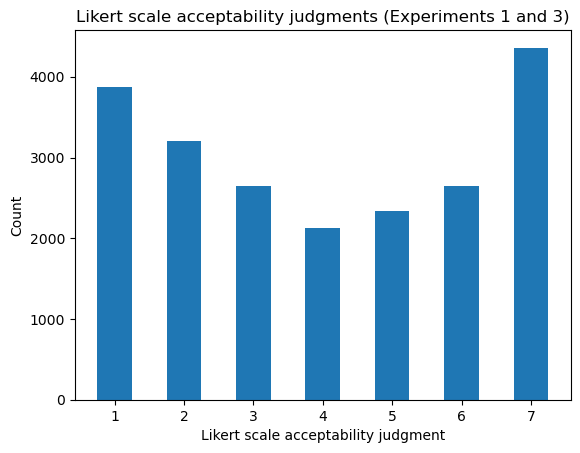

In [71]:
#| code-fold: true
#| code-summary: "Plotting code"

from numpy import arange
from matplotlib.pyplot import subplot


ax = subplot()
ax.hist(data.judgment, bins=arange(1, 9), rwidth=0.5, align="left")

ax.set_title("Likert scale acceptability judgments (Experiments 1 and 3)")
ax.set_xlabel("Likert scale acceptability judgment")
_ = ax.set_ylabel("Count")

### Scale normalization

Sprouse et al. also provide by-subject $z$-scores, which are the quantities they use as dependent variables in their analyses because they are believed to "[eliminate] certain kinds of scale biases between participants" [@sprouse_experimental_2016, p. 325]. These scores are derived by mapping ordinal scale ratings $y_n$ to $\frac{y_n - \text{mean}\left(\left\{y_n \mid s = \text{subj}(n)\right\}\right)}{\text{sd}\left(\left\{y_n \mid s = \text{subj}(n)\right\}\right)}$, where $\text{subj}$ maps a response index to a subject identifier. We can recompute these values and see that they have high correlation with those that Sprouse et al. compute–presumably differing only up to floating point error.

In [62]:
from numpy import round, corrcoef
from pandas import Series

def zscore(responses: Series) -> Series:
    """z-score responses
    
    Parameters
    ----------
    responses
        The responses to z-score
        
    Returns
    -------
    zscores
        The z-scored responses
    """
    return (responses - responses.mean()) / responses.std()

zscores_exp1 = data.groupby("subject").judgment.transform(zscore)

round(corrcoef(data.zscores, zscores_exp1)[1,0], 3)

0.998

We will *not* be using these $z$-scores for our implementation. Instead, we will the raw ordinal responses using an ordinal logit model–described below. This approach will be taken throughout the course on principled grounds: any preprocessing of a dependent variable necessarily introduces potentially important changes in the structure of that variable that can have downstream effects on statistical inference.^[In discussing the introduction of the magnitude estimation task by [@stevens_psychophysical_1957], @sprouse_acceptability_2018[p. 199] suggests that Likert scale tasks assume "...that participants treat the intervals between the response points as equal, but provides no mechanism to guarantee that." This suggestion is not quite right: a model that links the acceptability continuum (to use the Sprouse's terminology) to the Likert scale ratings may assume that response points correspond to intervals of the acceptability continuum that are of equal size; but it need not. For instance, an ordinal logit model–the kind of linking model we use below–can make the assumption that these intervals are of equal size, but most of the time, we use such a model because we *don't* want to make that assumption.] Nonetheless, for the purposes of plotting, $z$-scores can be useful, and we will use them below.

### Design

As mentioned above, the dataset has a factorial design, manipulating four factors:

a. `structure` (`non`-island, `island`): whether or not the sentence contains a purported island violation
b. `distance` (`short`, `long`): whether the number of words between the filler (i.e. the WH word) and the gap (i.e. the position the word is associated with) is small or large
c. `island` type (`ADJ`unct island, `NP` island, `SUB`ject island, `WH`ether island): if `structure` = `island` and `distance` = `long`, what the island violation type is
d. `dependency` type (`WH` main clause question, `RC`: relative clause, `DlinkedWH` main clause D-linked question, `DlinkedRC`: D-linked relative clause): whether the sentence is a WH interrogative or contains a relative clause and what the filler is (D-linked or not)

[](#exm-WH-whe-non-sh-05) [](#exm-WH-whe-non-lg-05) [](#exm-WH-whe-isl-sh-05) [](#exm-WH-whe-isl-lg-05) The first two factors–whose manipulation for `island`=`WH` and `dependency`=`WH` can be seen in (@exm-WH-whe-non-sh-05\-@exm-WH-whe-isl-lg-05), corresponding to items `WH.whe.non.sh.05`, `WH.whe.isl.sh.05`, `WH.whe.non.lg.05`, `WH.whe.isl.lg.05`–are intended to provide a way of estimating how acceptability is modulated by processing load–e.g. induced by having to keep a filler in memory longer before it can be linked with its gap–while keeping the meaning as constant as possible.^[It's important to note that when `distance`=`short` and `structure`=`island`, the dependency does not cross into an island. It's merely the case that there is an island in the sentence.]

(@exm-WH-whe-non-sh-05) Who thinks that Aaron bought the house? (`structure`=`non`, `distance`=`short`)
(@exm-WH-whe-isl-sh-05) Who wonders whether Aaron bought the house? (`structure`=`island`, `distance`=`short`)
(@exm-WH-whe-non-lg-05) What does the agent think that Aaron bought? (`structure`=`non`, `distance`=`long`)
(@exm-WH-whe-isl-lg-05) What does the agent wonder whether Aaron bought? (`structure`=`island`, `distance`=`long`)

@sprouse_experimental_2016 want this manipulation so that they can pull apart the contribution of what @sprouse_acceptability_2018[p. 210] refers to as "the 'grammar' component of the theory of acceptability", which he takes to be "something like an error signal from the structure-building component of the sentence processor" from world knowledge/typicality as well as "the 'sentence processing' component of the theory of acceptability judgments", which he takes to be "everything that isn't structure-building: parsing strategies for various types of ambiguity resolution, the complexity that arises from ambiguity resolution [e.g., surprisal, @hale_probabilistic_2001; @levy_expectation-based_2008], the complexity that arises from dependency processing [@gibson_linguistic_1998], the complexity that arises from working memory operations more generally [@lewis_activation-based_2005; @mcelree_memory_2003], and many others components."

We can get a quick intuition for what these effects might look like by looking at the average $z$-scores for the above items.

In [64]:
factors = [
    "island", "dependency",
    "distance", "structure" 
]

item05_ids = [
    "WH.whe.non.sh.05", "WH.whe.non.lg.05", 
    "WH.whe.isl.sh.05", "WH.whe.isl.lg.05"
]

data_exp1_item05 = data_exp1[data_exp1.item.isin(item05_ids)]
data_exp1_item05_means = data_exp1_item05.groupby(factors[2:] + ["item"])[["zscores"]].mean()

data_exp1_item05_means.sort_values("zscores", ascending=False).reset_index()

,distance,structure,item,zscores
0,short,non,WH.whe.non.sh.05,0.956486
1,short,island,WH.whe.isl.sh.05,0.944204
2,long,non,WH.whe.non.lg.05,0.857106
3,long,island,WH.whe.isl.lg.05,-0.427193


We can see (i) that the `distance`=`short` items (@exm-WH-whe-non-sh-05\-@exm-WH-whe-isl-sh-05) are judged to be about as acceptable as each other on average; (ii) that both `distance`=`long` items (@exm-WH-whe-non-lg-05\-@exm-WH-whe-isl-lg-05) are judged worse than both `distance`=`short` items on average; and (iii) that the `distance`=`long`, `structure`=`island` item (@exm-WH-whe-isl-lg-05), which is the one that has a dependency crossing an island boundary, is substantially worse than all the others on average. It is this sort of difference of differences that @sprouse_experimental_2016 take as evidence for the influence of a "grammar" component over and above a "sentence processing" component–in the senses put forth by @sprouse_acceptability_2018.

In [65]:
data_test = data.query("distance != 'filler'")

data_test_itemmeans = data_test.groupby(
    factors + ["item"]
)[["zscores"]].mean().reset_index()

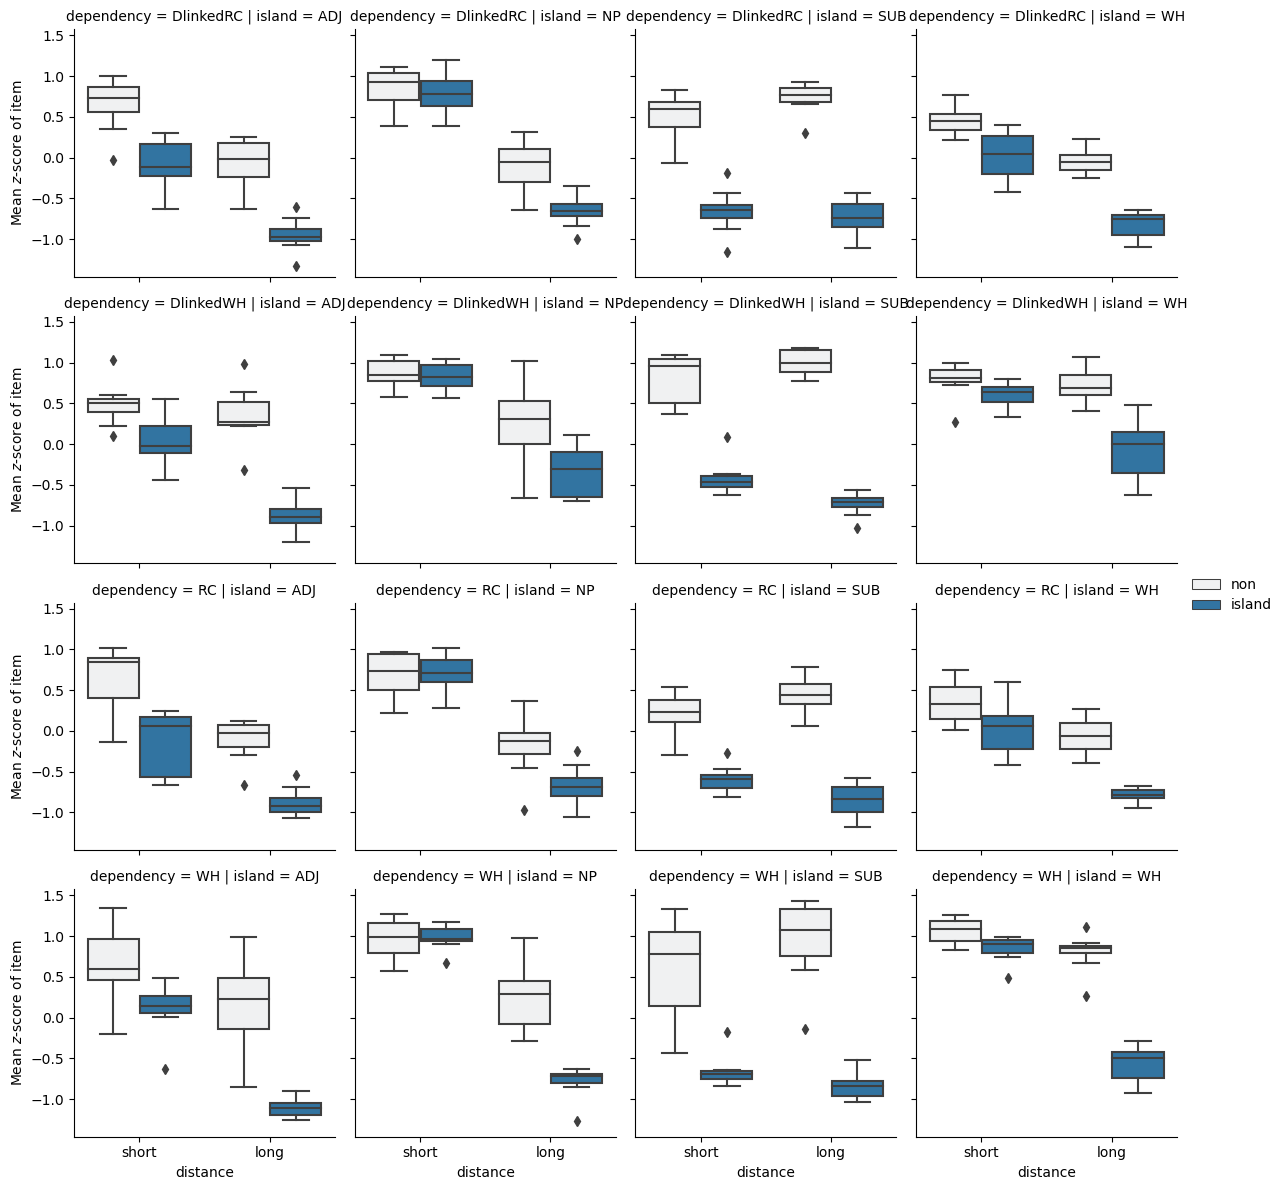

In [66]:
#| code-fold: true
#| code-summary: "Plotting code"

from seaborn import FacetGrid, boxplot

p = FacetGrid(
    data_test_itemmeans,
    col="island", row="dependency"
)

p.map(
    boxplot, 
    "distance", "zscores", "structure", 
    order=["short", "long"], 
    hue_order=["non", "island"]
)

p.set_ylabels(r"Mean $z$-score of item")

_ = p.add_legend()

In asking whether these data provide evidence for a categorical grammar or a gradient grammar, we are effectively asking whether the pattern of difference of differences across combinations of dependency type and island type are better explained as the product of a representation of the combination $d$ and $i$–i.e. the *interaction of* $d$ and $i$–that assumes a categorical grammar or a gradient grammar.

In [67]:
data_test_itemmeans["itemnum"] = data_test_itemmeans.item.map(
    lambda x: x.split(".")[-1]
)

data_test_itemmeans_cast = data_test_itemmeans.pivot_table(
    index=["island", "dependency", "itemnum"], 
    columns=["distance", "structure"], 
    values="zscores"
)

short_diffs = data_test_itemmeans_cast.short.non -\
              data_test_itemmeans_cast.short.island
long_diffs = data_test_itemmeans_cast.long.non -\
             data_test_itemmeans_cast.long.island

diffs_of_diffs = (short_diffs - long_diffs).reset_index()

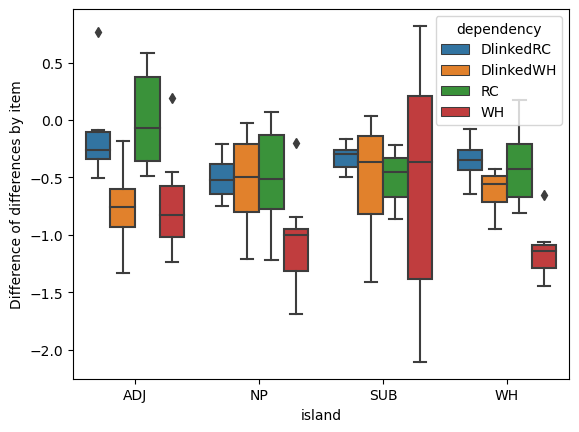

In [68]:
#| code-fold: true
#| code-summary: "Plotting code"

p = boxplot(
    diffs_of_diffs,
    x="island", y=0, hue="dependency"
)

_ = p.set_ylabel("Difference of differences by item")

In terms solely of fit, the answer here *must* be that the best-fitting gradient model will always fit the data as well or better than the analogous best-fitting categorical model. (We'll see why shortly.) The question is whether, once we consider the improved parsimony of the categorical family, the best-fitting categorical model is comparable to the gradient model. 

## Formalizing the model families

Let's consider what a categorical family is committed to in contrast to a gradient model. To do this, we need to back up and talk about how to model what @sprouse_acceptability_2018[p. 197] refers to as "the continuum of acceptability". We'll assume that the acceptability $\alpha_i$ of some natural language string $i$ can be represented by a real value (viewed as an element of an [ordered field](https://en.wikipedia.org/wiki/Ordered_field)). This assumption is relatively uncontroversial: even those researchers committed to some form of discreteness in the "grammar" component of the theory of acceptability assume the existence of processes that should be modeled as gradient–at least as a first pass. 

The first thing we need to do is to figure out how to model the relationship between $\alpha_i$–however it is determined–and the set of judgments for that item $\{y_n \mid \text{item}(n) = i\}$, where $\text{item}$ maps a response index to an item identifier. We'll refer to this component of our model as our *linking model*. How we define this model is important because *we do not directly observe* the true acceptability represented by $\alpha_i$; we must estimate it from the responses.^[As @sprouse_acceptability_2018[p. 196] notes, "[l]inking hypotheses are rarely amenable to direct investigation, so progress can only be measured by the success of the theory that results from the linking hypothesis plus the empirically collected data."]

### The Ordinal Logit Linking Model

To model ordinal responses $y_n$, we will use an [ordered logit model](https://en.wikipedia.org/wiki/Ordered_logit), which will be parameterized by our real-valued $\alpha_{\text{item}(n)}$ and $K \equiv r_\text{max} - r_\text{min}$ *cutpoints* $\mathbf{c}_{\text{subj}(n)}$ specific to each subject, where $r_\text{max}$ is the highest rating–7 in the Sprouse et al. data–and $r_\text{min}$ is the lowest–1 in the Sprouse et al. data.^[It is often the case that analyses will assume a shared set of cutpoints for all subjects. This assumption fails to model potential variability in how subjects use the ordinal response scale.] Let's assume that $c_{sr_\text{min}} \sim \mathcal{N}(0, \sigma^2_\text{cutpoint})$ and that:

$$C_{s(r+1)} - C_{sr} \sim \text{Gamma}(2, 1)$$

We want a distribution–like the [gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution)–on distances between cutpoints that has only positive support so that we can enforce a strict ordering assumption: $\forall r \in \{r_\text{min}, \ldots, r_\text{max}\}: c_{sr} < c_{s(r+1)}$. Any distribution with positive support would work here.

In [11]:
from scipy.stats import gamma

# uses the k, theta (scale) parameterization
cutpoint_distance_dist = gamma(2.0, scale=1.)

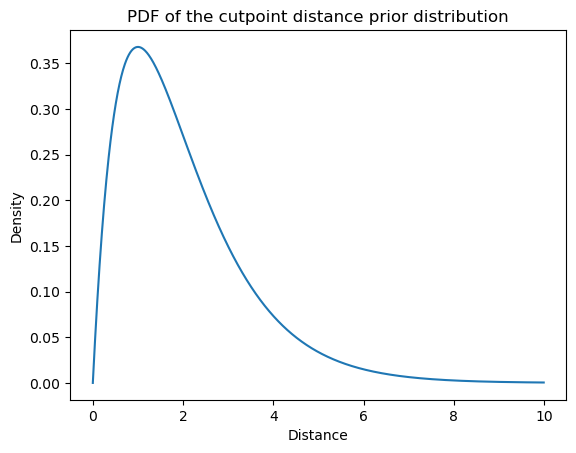

In [69]:
#| code-fold: true
#| code-comment: "Plotting code"

from numpy import mgrid
from matplotlib.pyplot import subplot

ax = subplot()

distance = mgrid[0:10:0.01]
density = cutpoint_distance_dist.pdf(distance)

ax.plot(distance, density)

ax.set_title(r"PDF of the cutpoint distance prior distribution")
ax.set_xlabel(r"Distance")
_ = ax.set_ylabel("Density")

The reason why we want a strict ordering assumption is that we're going to use these $K=6$ cutpoints to define $K+1 = 7$ bins $\{(-\infty, c_{sr_\text{min}}), (c_{sr_\text{min}}, c_{sr_\text{min} + 1}), \ldots, (c_{sr_\text{max}-2}, c_{sr_\text{max}-1}), (c_{sr_\text{max}-1}, \infty)\}$ of contiguous real values. Each bin will correspond to a possible rating $\{r_\text{min}, \ldots, r_\text{max}\}$.

In [13]:
from numpy import sort
from numpy.random import seed

seed(302984)

n_resp_levels = 7

jumps = cutpoint_distance_dist.rvs(n_resp_levels-1)
cutpoints = jumps.cumsum()
cutpoints -= cutpoints.min()

cutpoints

array([ 0.        ,  3.01509045,  5.3033194 ,  8.44799298, 13.82188812,
       14.96264086])

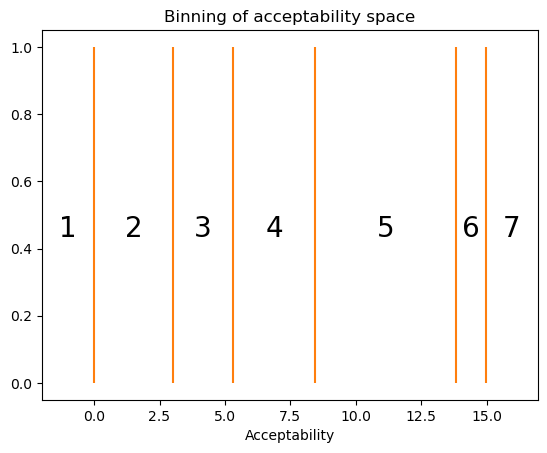

In [14]:
#| code-fold: true
#| code-comment: "Plotting code"

from numpy import ndarray

def plot_cutpoints(ax, cutpoints: ndarray, ymin: float = 0, ymax: float = 1) -> None:
    ax.axis(xmin=cutpoints[0] - 2, xmax=cutpoints[-1] + 2)
    ax.vlines(cutpoints, ymin, ymax, colors="C1")
    
    height = (ymax + ymin) / 2
    
    for i, c_i in enumerate(cutpoints):
        if i:
            _ = ax.annotate(
                i + 1,
                xy=((c_i + cutpoints[i-1]) / 2, height), xycoords='data',
                horizontalalignment='center', verticalalignment='top',
                fontsize=20,
            )
        elif not i:
            _ = ax.annotate(
                i + 1,
                xy=((c_i - 1), height), xycoords='data',
                horizontalalignment='center', verticalalignment='top',
                fontsize=20
            )
            
    _ = ax.annotate(
        cutpoints.shape[0] + 1,
        xy=((cutpoints[-1] + 1), height), xycoords='data',
        horizontalalignment='center', verticalalignment='top',
        fontsize=20
    )

ax = subplot()
    
plot_cutpoints(ax, cutpoints)

ax.set_title("Binning of acceptability space")
_ = ax.set_xlabel("Acceptability")

What makes this model an ordered *logistic* model is its assumptions about how randomness in the responses comes about: namely, that participants produce the ordinal value $y_n$ corresponding to the bin in which $\alpha_{\text{item}(n)} + \epsilon_n$ falls, where $\epsilon_n \sim \text{Logistic}(0, 1)$ is an error term distributed [logistic](https://en.wikipedia.org/wiki/Logistic_distribution). That is, the PDF of $\epsilon_n$ is:

$$f(x) = \frac {e^{-x}}{\left(1+e^{-x}\right)^{2}}$$

In [15]:
from scipy.stats import logistic

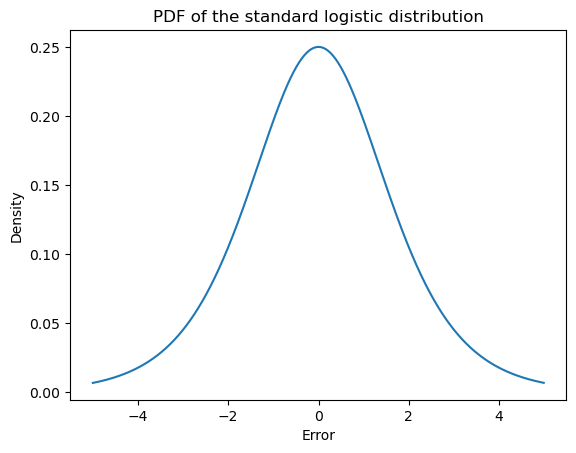

In [16]:
#| code-fold: true
#| code-comment: "Plotting code"

ax = subplot()

logodds = mgrid[-5:5:0.01]
density = logistic(0, 1).pdf(mgrid[-5:5:0.01])

ax.plot(logodds, density)

ax.set_title(r"PDF of the standard logistic distribution")
ax.set_xlabel(r"Error")
_ = ax.set_ylabel("Density")

For instance, if we simulate multiple draws for a $Y_n$ whose $\alpha_{\text{item}(n)}$ is in the center of the bin for response 4 and whose cutpoints $\mathbf{c}_{\text{subj}(n)}$ are the ones we sampled above...

In [17]:
seed(3029)

mu_n = (cutpoints[3] + cutpoints[2]) / 2

samples = mu_n + logistic(0, 1).rvs(10_000)

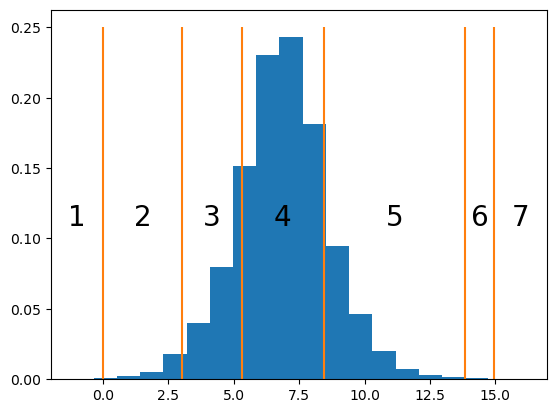

In [19]:
#| code-fold: true
#| code-comment: "Plotting code"

ax = subplot()

plot_cutpoints(ax, cutpoints, 0, 0.25)

_ = ax.hist(samples, density=True, bins=20)

...we obtain a frequency distribution that peaks at 4, since $\alpha_{\text{item}(n)} + \epsilon_n$ has most density within $(c_{{\text{subj}(n)}, 3}, c_{{\text{subj}(n)}, 4})$, but where there are a fair number of 3s and 5s, since those value have a fair amount of density.

In [20]:
responses = (samples[:,None] > cutpoints[None,:]).sum(axis=1) + 1

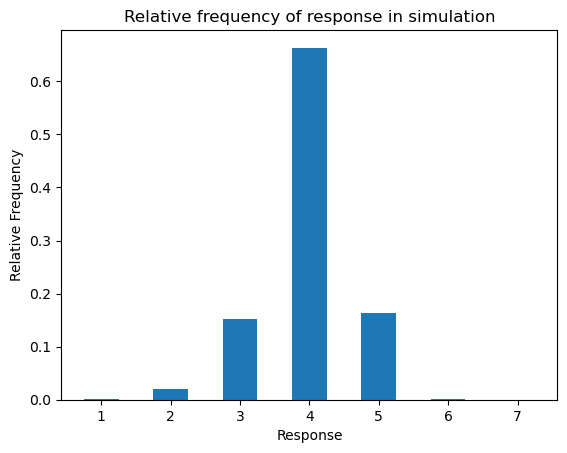

In [22]:
#| code-fold: true
#| code-comment: "Plotting code"

ax = subplot()
_ = ax.hist(responses, bins=arange(1, 9), rwidth=0.5, align="left", density=True)

ax.set_title(r"Relative frequency of response in simulation")
ax.set_xlabel(r"Response")
_ = ax.set_ylabel("Relative Frequency")

We will express that $Y_n$ is distributed ordered logistic with:

$$
\begin{align*}
Y_n &\sim \text{OrderedLogistic}\left(\alpha_{\text{item}(n)}, \mathbf{c}_{\text{subj}(n)}\right)\\
\end{align*}
$$

To make the notation a bit less complex moving forward, I'm going to write $\alpha_i$–rather than $\alpha_{\text{item}(n)}$ and $\mathbf{c}_s$–rather than $\mathbf{c}_{\text{subj}(n)}$–leaving implicit the statements "where $i \equiv \text{item}(n)$" and "where $s \equiv \text{subj}(n)$".

The way of thinking about $Y_n$ described above effectively defines the PMF in terms of an expectation of $\epsilon_n$–which, remember, is a random variable. To make things a bit simpler, let's assume we're working with the [extended reals](https://en.wikipedia.org/wiki/Extended_real_number_line), so we can say that $c_{s(r_\text{min}-1)} = -\infty$ and that $c_{sr_\text{max}} = +\infty$ for all subjects $s$. Then, for $r \in \{r_\text{min}, \ldots, r_\text{max}\}$:

$$\begin{align*}
\mathbb{P}(Y_n=r\mid\alpha_i, \mathbf{c}_s) &= \int_\mathbb{R} f(e)\mathbb{P}(Y_n=r\mid\alpha_i, \mathbf{c}_s,e) \,\mathrm{d}e\\
&= \int_\mathbb{R} f(e)\mathbb{P}\left(\alpha_i+e \in (c_{s(r-1)}, c_{sr})\right)\,\mathrm{d}e\\
&= \int_\mathbb{R} f(e)\mathbb{P}\left(e \in (c_{s(r-1)} - \alpha_i, c_{sr} - \alpha_i)\right)\\ 
&= \mathbb{E}\left[\mathbb{P}\left(\epsilon_n \in (c_{s(r-1)} - \alpha_i, c_{sr} - \alpha_i)\right)\right]\\ 
\end{align*}$$

This expression looks a bit hairy, but it turns out that we can express the PMF of $Y_n$ analytically. To do this, we first need to note that, for a fixed $e$: 

$$\begin{align*}
\mathbb{P}\left(e \in (c_{s(r-1)} - \alpha_i, c_{sr} - \alpha_i)\right) &= F(c_{sr} - \alpha_i) - F(c_{s(r-1)} - \alpha_i)\\
&= \text{logit}^{-1}(c_{sr} - \alpha_i) - \text{logit}^{-1}(c_{s(r-1)} - \alpha_i)
\end{align*}$$ 

where $F(x) = \text{logit}^{-1}(x) = \frac{1}{1 + \exp(-x)}$ is the CDF of the standard logistic distribution.

This function is also often called the inverse logit, logistic, or expit function. It can be viewed as mapping a log-odds to a probability. You may be familiar with it in the context of [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), where we model the conditional expectation $\text{logit}\;\mathbb{E}[Y \mid \mathbf{X}]$ of a Bernoulli random variable $Y$–e.g. a variable indicating whether a sentence is *acceptable* or *unacceptable*–given some predictors $\mathbf{X}$–e.g. `dependency`, `island`, `structure`, and `distance` from Sprouse et al.'s dataset.

In [23]:
from scipy.special import expit

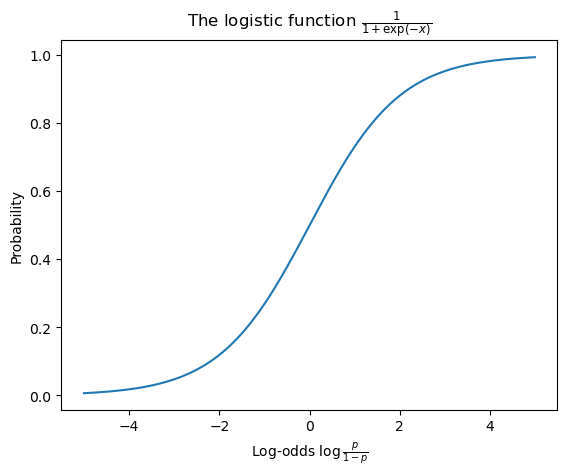

In [24]:
#| code-fold: true
#| code-comment: "Plotting code"

ax = subplot()

logodds = mgrid[-5:5:0.01]
probability = expit(mgrid[-5:5:0.01])

ax.plot(logodds, probability)

ax.set_title(r"The logistic function $\frac{1}{1+\exp(-x)}$")
ax.set_xlabel(r"Log-odds $\log\frac{p}{1-p}$")
_ = ax.set_ylabel("Probability")

Thus, $\mathbb{E}\left[\mathbb{P}\left(\epsilon_n \in (c_{s(r-1)} - \alpha_i, c_{sr} - \alpha_i)\right)\right]$ is actually the expected value of a constant $\text{logit}^{-1}(c_{sr} - \alpha_i) - \text{logit}^{-1}(c_{s(r-1)} - \alpha_i)$ (relative to $\epsilon_n$), which means that, for $r \in \{r_\text{min}, \ldots, r_\text{max}\}$:

$$\mathbb{P}(Y_n=r\mid\alpha_i, \mathbf{c}_s) = \text{logit}^{-1}(c_{sr} - \alpha_i) - \text{logit}^{-1}(c_{s(r-1)} - \alpha_i)$$

More explicitly, the PMF of $Y_n$ is:

$$\mathbb{P}(Y_n = r \mid \alpha_i, \mathbf{c}_s) = \begin{cases} 
\text{logit}^{-1}(c_{sr} - \alpha_i) & \text{if } r = r_\text{min}\\
\text{logit}^{-1}(c_{sr} - \alpha_i) - \text{logit}^{-1}(c_{s(r-1)} - \alpha_i) & \text{if } r_\text{min} < r < r_\text{max}\\
1 - \text{logit}^{-1}(c_{s(r-1)} - \alpha_i) & \text{if } r = r_\text{max}\\
0 & \text{otherwise}\\
\end{cases}$$

We commonly compute this by first computing the CDF and then taking the cumulative difference. 

$$\mathbb{P}(Y_n \leq r \mid \alpha_i, \mathbf{c}_s) = \begin{cases} 
0 & \text{if } r < r_\text{min}\\
\text{logit}^{-1}(c_{sr} - \alpha_i) & \text{if } r < r_\text{max}\\
1 & \text{if } r \geq r_\text{max}\\
\end{cases}$$ 

In [25]:
from numpy import concatenate, ones, zeros, arange

def ordinal_pmf(mu: ndarray, cutpoints: ndarray):
    n, = mu.shape
    
    cdf = expit(cutpoints[None,:] - mu[:,None])
    
    return concatenate([cdf, ones([n, 1])], axis=1) -\
           concatenate([zeros([n, 1]), cdf], axis=1)

If we compute the PMF for the value of $\alpha_i$ we simulated against above, we get something very close to the relative frequency distribution we observed before.

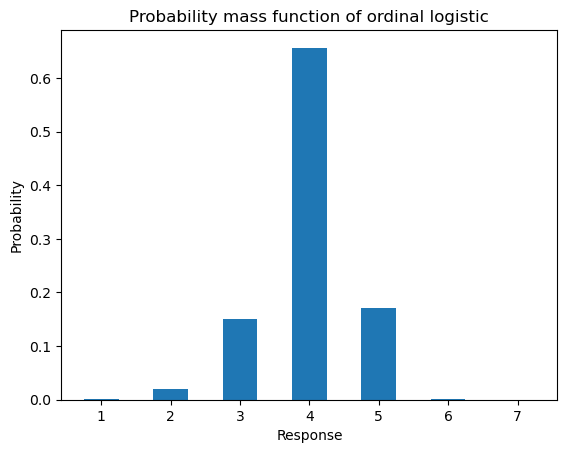

In [26]:
#| code-fold: true
#| code-comment: "Plotting code"

ax = subplot()

ax.bar(arange(1, 8), ordinal_pmf(mu_n*ones(1), cutpoints)[0], 0.5)

ax.set_title(r"Probability mass function of ordinal logistic")
ax.set_xlabel(r"Response")
_ = ax.set_ylabel("Probability")

If we sweep the value of $\alpha_i$ relative to the set of cutpoints we sampled above, then plot the resulting PMF, the ordinal constraints on the distribution become apparent. Also notice that for 6, which has a very small bin relative to the other responses, no setting of $\alpha_i$ gives it a very high probability.

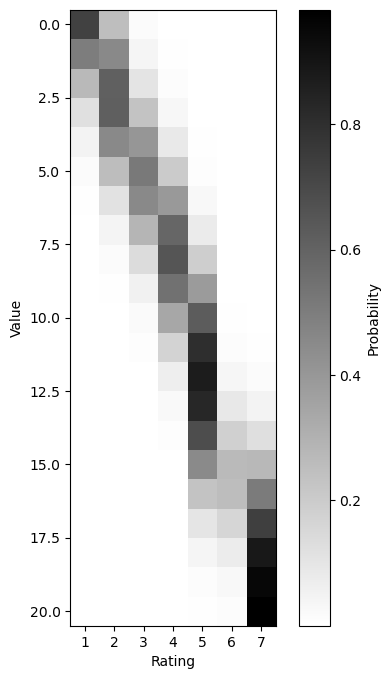

In [35]:
#| code-fold: true
#| code-comment: "Plotting code"

from matplotlib.pyplot import subplots

pmfs = ordinal_pmf(arange(-1, 20), cutpoints)

fig, ax = subplots(figsize=(6, 8))
img = ax.imshow(pmfs)
ax.set_xticks(arange(7), arange(1,8))
ax.set_xlabel("Rating")
ax.set_ylabel("Value")
img.set_cmap('binary')
_ = fig.colorbar(img, label="Probability")

Thus, the ordinal logistic model allows us to capture preference or dispreference for a particular response level by manipulating the bin size associated with that level. This manipulation of the bin size is how we model subjects' preferences for particular bins. For instance, the subject we simulated above has a fairly strong dispreference for using a 6 response, which is a consequence of how small the bin for 6 is and which can be seen in the fact that no row of the above plot is particularly dark for 6.

There are many ways to set up the distribution on subject-specific cutpoints. In the current context, we are going to assume a general set of cutpoints $\bar{\mathbf{c}}$ that subjects rigidly shift left or right via a subject-specific intercept term $\rho^\text{subj}_s \sim \mathcal{N}\left(0, \sigma^2_\text{subj}\right)$. That is, $\mathbf{c}_s \equiv \bar{\mathbf{c}} + \rho^\text{subj}_s$–holding all assumptions above fixed. This assumption is fairly standard and the default in libraries like [`ordinal`](https://rdrr.io/cran/ordinal/). An alternative assumption, which we will make later in the course, is that that subjects' cutpoints $\mathbf{c}_s$ can freely vary–allowing different subjects to have different preferences for different ordinal responses.

### A First (Poor) Approximation

Given the above setup, the simplest model we might define is one in which every item is equally acceptable and all the variability in responses is modeled by the error term and variability in how subjects bin the continuum of acceptability. That is, there is a single $\mu$ such that $\alpha_i \equiv \mu$. This model is effectively a [random effects model](https://en.wikipedia.org/wiki/Random_effects_model), where the subject-specific intercepts $\rho^\text{subj}_s$ are the random effects.

We'll use STAN to implement this model. You can find a very brief introduction to STAN [here](../foundational-concepts-in-probability-and-statistics/statistical-inference.ipynb#implementing-samplers-in-stan) in the course notes on [statistical inference](../foundational-concepts-in-probability-and-statistics/statistical inference). 

The `data` block needs to specify information about both the responses and the subjects.

```{.stan include="models/intercept-only-model/intercept-only-model.stan" start-line=1 end-line=7}
```

We will have three (sets of) parameters: 

1. the fixed representation of acceptability for every item `acc_mean`
2. the standard deviation of the subject random intercepts `subj_intercept_std` and the `subj_intercepts` themselves
3. the distances ("`jumps`") between cutpoints

```{.stan include="models/intercept-only-model/intercept-only-model.stan" start-line=9 end-line=14}
```

To enforce the prior on the distances between cutpoints–henceforth referred to as `jumps`–it will be useful to define them in `transformed parameters`. 

```{.stan include="models/intercept-only-model/intercept-only-model.stan" start-line=16 end-line=27}
```

The `model` block then encodes the distributional assumptions about the subject random intercepts and cutpoints mentioned above, as well as the assumption that `resp[n]` $\sim \text{OrderedLogistic}($ `mu`, `cutpoints + subj_intercept[subj[n]]`$)$.

```{.stan include="models/intercept-only-model/intercept-only-model.stan" start-line=29 end-line=42}
```

Finally, the `generated quantities` block computes the log-likelihood of each datapoint (`log_lik`), which is necessary for model comparison later.

```{.stan include="models/intercept-only-model/intercept-only-model.stan" start-line=43 end-line=63}
```

### A Second (Slightly Less Poor) Approximation

A better version of this model adds item-specific random intercepts $\rho^\text{item}_i \sim \mathcal{N}\left(0, \sigma^2_\text{item}\right)$ that allow us to better predict the distribution of responses for a particular item. The main change is to define the distribution on responses as: 

$$Y_n \sim \text{OrderedLogistic}\left(\alpha_{\text{item}(n)} + \rho^\text{item}_{\text{item}(n)}, \mathbf{c} + \rho^\text{subj}_{\text{subj}(n)}\right)$$

To implement this model, we need to add item identity information to the `data` block.

```{.stan include="models/item-random-effects-model/item-random-effects-model.stan"  start-line=1 end-line=9 source-line-numbers="3,6"}
```

In the `parameters` block, we need to add the item random intercepts (`item_intercept` = $\boldsymbol\rho$) as well as a parameter for their prior (`item_intercept_std` = $\sigma_\text{item}$).

```{.stan include="models/item-random-effects-model/item-random-effects-model.stan"  start-line=11 end-line=20 source-line-numbers="3-4"}
```

In the `transformed parameters` block, we will define $\alpha_i = \mu + \rho_i$.

```{.stan include="models/item-random-effects-model/item-random-effects-model.stan"  start-line=22 end-line=37 source-line-numbers="11-15"}
```

And finally, in the model block, we state that `item_intercept` $\sim \mathcal{N}(0,$ `item_intercept_std` $^2)$ and we update the response distribution to reflect the addition of item-specific random intercepts.

```{.stan include="models/item-random-effects-model/item-random-effects-model.stan"  start-line=39 end-line=55 source-line-numbers="2-3,11-16"}
```

As we will see, this model will fit the data much better. But it's still not a very good model. The reason is that, since the random intercepts are item-specific, the model cannot predict responses to items it hasn't seen before particularly well. If we have an estimate for a particular participant's cutpoints, the best we can do is to compute the probability of a particular response by marginalizing over the item-specific random intercepts.

$$\begin{align*}
\mathbb{P}(Y_n = r \mid \mu, \mathbf{c}, \rho^\text{subj}_{\text{subj}(n)}; \sigma_\text{item}) &= \int_\mathbb{R} \mathbb{P}(Y_n = r \mid \mu, \rho)p(\rho; \sigma_\text{item})\,\mathrm{d}\rho\\
&= \int_\mathbb{R} \text{OrderedLogistic}\left(r \mid \mu + \rho, \mathbf{c}_{\text{subj}(n)}\right)\mathcal{N}\left(\rho; 0, \sigma_\text{item}^2\right)\,\mathrm{d}\rho\\
\end{align*}$$

### Adding Grammar and Processing Effects

To improve the predictive power of our models, we need to add information about properties of the items to our models–e.g. `dependency`, `island`, `structure`, and `distance`. How we add this information will correspond to the family of models we are fitting. All of these models will be *mixed effects models* or extensions thereof, so what I want to do now is to define a general mixed effects model. All our models from here on out in this module will use this model or some slight modification of it. To keep with our theme of focusing on the acceptability $\alpha_i$ of a particular item $i$, I'm going to describe the mixed effects models we use in a slightly non-standard way that will hopefully make clear why we are using them. 

We are going to define $\alpha_i$ in terms of some *fixed effects* $\mathbf{x}^\text{fixed}_i$–in our case, some subset and/or combination of `dependency`, `island`, `structure`, and `distance`–as well as item random effects $\mathbf{x}^\text{item}_i$. We will assume that the fixed effects $\mathbf{x}^\text{fixed}_i$ and $\mathbf{x}^\text{item}_i$ use a [dummy coding](https://stats.oarc.ucla.edu/spss/faq/coding-systems-for-categorical-variables-in-regression-analysis-2/#DUMMYCODING) of the variables of interest and that the first element of both is always $1$. The latter assumption allows us to easily represent an intercept term.

We will say that $\alpha_i$ is a linear function of $\mathbf{x}^\text{fixed}_i$ and $\mathbf{x}^\text{by-item}_i$: 

$$\alpha_i = \mathbf{x}^\text{fixed}_i \cdot \boldsymbol\beta + \mathbf{x}^\text{item}_i \cdot \boldsymbol\rho^\text{item}_i$$

where $\boldsymbol\beta \in \mathbb{R}^{K_\text{fixed}}$ is the *fixed effect coefficients* and $\boldsymbol\rho^\text{item}_i \in \mathbb{R}^{K_\text{item}}$ are the *by-item random effect coefficients*. The former ($\boldsymbol\beta$) track the effect on acceptability that a particular aspect of the linguistic expression has in general, while the latter ($\boldsymbol\rho^\text{item}_i$) track the way in which a particular item modulates these effects. In our case, we will keep the by-item random effect coefficients very simple: they will effectively just be equivalent to the random intercept above–i.e. $\mathbf{x}^\text{item}_i = [1]$ and thus $\rho_{i1}$  is an intercept.

In addition to acceptability $\alpha_{\text{item}(n)}$, we will assume that the distribution of response $Y_n$ is sensitive to ways that particular participants' perception of acceptability is modulated by particular properties $\mathbf{x}^\text{subj}_{\text{item}(n)}$ of the item they are rating. As for the fixed effects, $\mathbf{x}^\text{subj}_{\text{item}(n)}$ will be some subset and/or combination of `dependency`, `island`, `structure`, and `distance`. 

We model this modulation in terms of *by-subject random effect coefficients* $\boldsymbol\rho^\text{item}_s \in \mathbb{R}^{K_\text{subj}}$, defining the distribution of response $Y_n$ as:

$$Y_n \sim \text{OrderedLogistic}\left(\alpha_{\text{item}(n)} + \mathbf{x}^\text{subj}_{\text{item}(n)} \cdot \boldsymbol\rho^\text{subj}_{\text{subj}(n)}, \mathbf{c}\right)$$

This form looks slightly different than what we used for the first two models, but we could just as well have written it:

$$Y_n \sim \text{OrderedLogistic}\left(\alpha_{\text{item}(n)}, \mathbf{c} + \mathbf{x}^\text{subj}_{\text{item}(n)} \cdot \boldsymbol\rho^\text{subj}_{\text{subj}(n)}\right)$$

The main difference is that the signs invert: a shift up of the cutpoints is equivalent to a shift down in the acceptability.

To implement a mixed effects model in STAN, we need to add a few things to the `data` block, specifying how many fixed effect, by-item, and by-subject effects there are and what they are.

```{.stan include="models/mixed-effects-model/mixed-effects-model.stan" start-line=1 end-line=15 source-line-numbers="6-11"}
```

We additionally need to add to the `parameters` block a representation of the fixed effect and augment the by-item and by-subject effects from scalars to vectors, with a corresponding change to covariance matrices.

```{.stan include="models/mixed-effects-model/mixed-effects-model.stan" start-line=17 end-line=24 source-line-numbers="2-6"}
```

Rather than defining the acceptability by item in the `transformed parameters` block, it makes more sense to define it for each response, since both item and subject modulate it.

```{.stan include="models/mixed-effects-model/mixed-effects-model.stan" start-line=26 end-line=46 source-line-numbers="12-20"}
```

Finally, the main change in the `model` block is for handling the augmentation of the by-item and by-subject effects from scalars to vectors.

```{.stan include="models/mixed-effects-model/mixed-effects-model.stan" start-line=48 end-line=71 source-line-numbers="2-7,13-18"}
```

#### No Grammatical Effects

The first model we will interested in within this general framework is one that accounts for the effects of `structure` (`non`-island v. `island`) and `distance` (`short` v. `long`) for each combination of `island` type (`ADJ`unct island, `NP` island, `SUB`ject island, `WH`ether island) and `dependency` type (`WH` v. `RC` v. `DlinkedWH` v. `DlinkedRC`) but does not capture the crucial interaction between `structure` and `distance` for any of them. Using the R formula interface, this model would be `judgment ~ (distance + structure) * island * dependency`.

#### Adding a Grammatical Representation

The second two models we will consider are also vanilla mixed effects models. The first assumes that all island violations have the same effect on acceptability: `judgment ~ (distance + structure) * island * dependency + distance:structure`. This model is consistent with the assumption that all islands are ungrammatical to the same extent and that that ungrammaticality yields the same decrement along the acceptability continuum–equal to whatever the coefficient $\beta_{\text{distance} \times \text{structure}}$ corresponding to the interaction term is. This assumption is technically consistent with either a categorical or gradient grammar, though in the latter case, the gradience would do no work–i.e. it is effectively a perverse sort of discrete grammar. I will refer to this as the minimal interaction model.

The second of these models assumes that all island violations have potentially distinct effects on acceptability: `judgment ~ distance * structure * island * dependency`. That is, there is a potentially distinct effect for every combination of island type and dependency type and there is no necessary relation among those effects. This assumption is consistent only with a gradient grammar, since any pair of effects could be arbitrarily similar but distinct. I will refer to this as the maximal interaction model.

#### Making the space of grammatical representations more granular

The minimal and maximal interaction models are extremes along a conceptual continuum that ignore two possibilities: (i) some combinations of island type and dependency type may not result in either categorical or gradient ungrammaticality; and (ii) the effects of island violations may *cluster*. A potential example of possibility (i) is that some of the differences of differences we observed above (duplicated below) are very near 0 on average. A potential example of (ii) is that the medians for many of these differences of differences are very near each other.

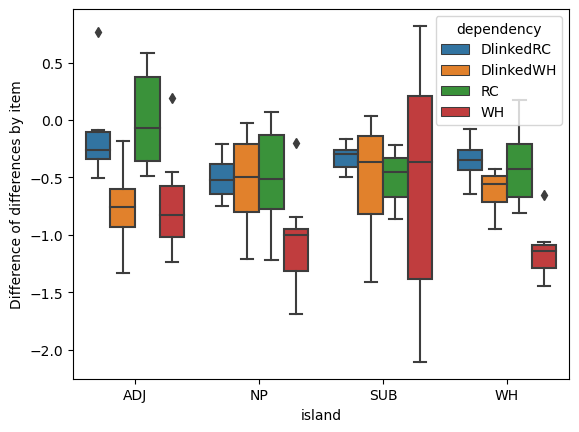

In [70]:
#| code-fold: true
#| code-summary: "Plotting code"

p = boxplot(
    diffs_of_diffs,
    x="island", y=0, hue="dependency"
)

_ = p.set_ylabel("Difference of differences by item")

To capture both ideas, we can add some additional structure into how we represent the interaction effects in our mixed effects models. The basic idea is to assume that each pairing of an island type $i$ and a dependency type $d$ might be associated with a discrete indicator $g_{di} \in \{0, \ldots, G\}$ of its *level of ungrammaticality* [@chomsky_aspects_1965; @chomsky_barriers_1986], where $G$ is the maximal number of grammatical violations associated with any structure. We then define the island effect associated with island type $i$ and a dependency type $d$ in terms of $g_{di} \sim \text{Categorical}(\boldsymbol{\gamma})$.

Depending on (i) how large $G$ is and (ii) how we constrain the relationship between the effect and $g_{di}$, we get models that live between the extremes of our minimal and maximal interaction models. We will consider two ways that $g_{di}$ might determine the effect: either (a) increments of ungrammaticality come with constant penalty on the acceptability continuum $\delta$ and therefore the total decrement for $g_{di}$ increments of ungrammaticality is $\delta g_{di}$; or (b) increments of ungrammaticality come with potentially variable penalties on the acceptability continuum $\boldsymbol\delta$ and therefore the total decrement for $g_{di}$ increments of ungrammaticality is $\sum_{g' = 1}^{g_{di}} \delta_{g'}$, for some sequence of penalty term $\boldsymbol\delta$. I will refer to the first as the *constrained clustered mixed effects model* and the second as the *unconstrained clustered mixed effects model*.

If $G = 1$, the two models are equivalent, and we have a model that minimally augments our minimal interaction model with the ability to say that some island violations do not cause a decrement in acceptability. But when $G = 2$, the models begin to pull apart, becoming more drastic as $G \rightarrow \infty$.

Either sort of model is technically consistent with a categorical or gradient grammar, insofar as the gradient grammar is willing to posit at least some amount of underlying discreteness. But as for the the minimal interaction model, associating at least the family of constrained clustered interaction models with a gradient grammar is potentially perverse: where would the equidistance in the acceptability decrements come from?

To implement the two clustered interaction models, we will add to the `data` block from the mixed effects model a specification of the number of grammaticality levels (`N_grammaticality_levels`$= G+1$) and the interactions we're modeling.

```{.stan include="models/constrained-clustered-interaction-model/constrained-clustered-interaction-model.stan" start-line=1 end-line=18 source-line-numbers="2-3,14"}
```

To the `parameters` block of the constrained clutered interaction model, we'll add the `penalty` $\delta$ and a parameter `gamma` that representations the probability of each grammaticality level.

```{.stan include="models/constrained-clustered-interaction-model/constrained-clustered-interaction-model.stan" start-line=20 end-line=29 source-line-numbers="2-3"}
```

Analogously, to the `parameters` block of the unconstrained clutered interaction model, we'll add `N_grammaticality_levels`$-1 = G$ `penalty`s $\boldsymbol\delta$ and an analogous `gamma` parameter.

```{.stan include="models/unconstrained-clustered-interaction-model/unconstrained-clustered-interaction-model.stan" start-line=20 end-line=29 source-line-numbers="2-3"}
```

To compute the acceptability in the `transformed parameters` blocks, we do something similar to what we did for the mixed effects model. The main difference is that we need to track the acceptability under each assumed level of grammaticality.

*Constrained clustered mixed effects model*
```{.stan include="models/constrained-clustered-interaction-model/constrained-clustered-interaction-model.stan" start-line=31 end-line=54 source-line-numbers="13-23"}
```
*Unconstrained clustered mixed effects model*
```{.stan include="models/unconstrained-clustered-interaction-model/unconstrained-clustered-interaction-model.stan" start-line=31 end-line=65 source-line-numbers="13-34"}
```

The reason need to do this is that, because we are assuming that each pairing of island type and dependency type has a particular grammaticality that's shared across all items that instantiate that pair. This assumption implies that responses are only independent conditioned on the grammaticality associated with that structure. 

$$\begin{align*} 
p(\mathbf{y} \mid \boldsymbol\gamma, \delta, \mathbf{c}) &= \prod_{d,i} \sum_{g'} \mathbb{P}(g_{di} = g'; \boldsymbol\gamma, \delta, \mathbf{c}) \prod_{n: \text{struct}(n) = \langle d, i \rangle} p(y_n \mid g_{di} = g'; \boldsymbol\gamma, d, \mathbf{c})
\end{align*}$$

This assumption is represented in the `model` block:

```{.stan include="models/constrained-clustered-interaction-model/constrained-clustered-interaction-model.stan" start-line=56 end-line=107 source-line-numbers="24-51"}
```

This assumption also affects how we compute metrics for model comparison, which I'll come back to in the next section. I'll just say now that, to handle this, we need to compute the *membership probabilities* for each pairing of island type and dependency type–i.e. the posterior probability of the grammaticality levels given the responses to items instantiating that pairing. 

$$\mathbb{P}(g_{di} = g' \mid \{y_n: \text{struct}(n) = \langle d, i \rangle\}) \propto p(\{y_n: \text{struct}(n) = \langle d, i \rangle\} \mid g_{di} = g')\mathbb{P}(g_{di} = g')$$

We do this computation in the `generated quantities` block.

```{.stan include="models/constrained-clustered-interaction-model/constrained-clustered-interaction-model.stan" start-line=109 end-line=148 source-line-numbers="2-22"}
```

## Summing Up

Remember that we're interested in the question of how, for a particular family of theories, we can represent the effect on acceptability that any possible analysis under that theory could produce. We defined a range of theories with different levels of expressivity, and now what we need to do is to search among analyses that can be expressed in those theories for those that fit the data best. Once we have those analyses, we can then compare the families of theories by quantitatively measuring the fit of those theories' best analyses to the data and–as a measure of parsimony–weighing that fit against how many such best analyses there are. We will do this in the next section.